In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
import numpy as np
import os
import json

In [3]:

# Define the path to your folder
folder_path = '/cephfs/users/bashir/basis_classification/k10plus_2010_to_2020'

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

print(csv_files)


['k10plus_2016_books.csv', 'k10plus_2010_books.csv', 'k10plus_2013_books.csv', 'k10plus_2014_books.csv', 'k10plus_2011_books.csv', 'k10plus_2012_books.csv', 'k10plus_2018_books.csv', 'k10plus_2020_books.csv', 'k10plus_2019_books.csv', 'k10plus_2017_books.csv', 'k10plus_2015_books.csv']


In [4]:
# Initialize an empty list to hold the DataFrames
dfs = []

# Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Reading data for file {file}")
    df = pd.read_csv(file_path)
    df = df[~df['BK'].isna()]
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(dfs, ignore_index=True)

final_df.shape


Reading data for file k10plus_2016_books.csv


/tmp/ipykernel_3926927/1553341569.py:8: DtypeWarning: Columns (3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Reading data for file k10plus_2010_books.csv


/tmp/ipykernel_3926927/1553341569.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Reading data for file k10plus_2013_books.csv


/tmp/ipykernel_3926927/1553341569.py:8: DtypeWarning: Columns (3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Reading data for file k10plus_2014_books.csv


/tmp/ipykernel_3926927/1553341569.py:8: DtypeWarning: Columns (3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Reading data for file k10plus_2011_books.csv


/tmp/ipykernel_3926927/1553341569.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Reading data for file k10plus_2012_books.csv


/tmp/ipykernel_3926927/1553341569.py:8: DtypeWarning: Columns (3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Reading data for file k10plus_2018_books.csv


/tmp/ipykernel_3926927/1553341569.py:8: DtypeWarning: Columns (3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Reading data for file k10plus_2020_books.csv


/tmp/ipykernel_3926927/1553341569.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Reading data for file k10plus_2019_books.csv


/tmp/ipykernel_3926927/1553341569.py:8: DtypeWarning: Columns (3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Reading data for file k10plus_2017_books.csv


/tmp/ipykernel_3926927/1553341569.py:8: DtypeWarning: Columns (3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Reading data for file k10plus_2015_books.csv


/tmp/ipykernel_3926927/1553341569.py:8: DtypeWarning: Columns (3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


(251172, 11)

In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251172 entries, 0 to 251171
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   PPN           251172 non-null  object
 1   Title         249465 non-null  object
 2   Author        41368 non-null   object
 3   Year          251172 non-null  object
 4   Summary       102722 non-null  object
 5   Work-1        2 non-null       object
 6   Work-2        2 non-null       object
 7   Keywords      141548 non-null  object
 8   LOC_Keywords  104460 non-null  object
 9   RVK           124773 non-null  object
 10  BK            251172 non-null  object
dtypes: object(11)
memory usage: 21.1+ MB


In [6]:
final_df.drop(columns=['Work-2','Work-1'], inplace=True)



In [7]:
def is_number(value):
    try:
        float(value)
        return True
    except ValueError:
        return False
    
# Step 1: Clean and preprocess
final_df["BK_split"] = final_df["BK"].fillna("").apply(lambda x: x.split("|") if x else [])
# Apply to each list of BK codes
final_df["BK_all_numeric"] = final_df["BK_split"].apply(lambda bk_list: all(is_number(x) for x in bk_list))
final_df[final_df["BK_all_numeric"]== False].sample(10)

,PPN,Title,Author,Year,Summary,Keywords,LOC_Keywords,RVK,BK,BK_split,BK_all_numeric
105504,1655338080,Campus und Profession - Pfarrdienst in der Eva...,NaN,2012,Die evangelischen Studierendengemeinden (ESG) ...,NaN,NaN,Studentengemeinde/Studentenmission,2DEsl|11.76|81.80|11.55,"[2DEsl, 11.76, 81.80, 11.55]",False
166301,1786561018,Magdeburger Moderne,NaN,2020,NaN,Architektur,NaN,NaN,15.48|21.71|56.62|Architekturgeschichte,"[15.48, 21.71, 56.62, Architekturgeschichte]",False
134432,1771734981,dPal sa-skyavi zhal-vdon phyogs-bsdus,NaN,2018,NaN,Saskya,NaN,NaN,Tibetisch|Buddhismus,"[Tibetisch, Buddhismus]",False
222296,1849756821,Deutsche Werbegeschichte,Rings,2015,NaN,Werbeplakat,NaN,NaN,21.82||z|Geschichte|21.37,"[21.82, , z, Geschichte, 21.37]",False
79417,1656103311,The @Sufi doctrine of man,NaN,2014,Preliminary Material -- Introduction -- Life a...,Menschenbild,"Ṣadr al-Dīn al-Qūnawī, Muḥammad ibn Isḥāq -127...",NaN,|11.83,"[, 11.83]",False
68161,1748692968,Le @conjoint en droit pénal comparé français e...,Al Chami,2014,"Cette thèse porte sur l'étude de ""conjoint en ...",NaN,NaN,NaN,familienrecht,[familienrecht],False
67315,1772065617,Le @Miroir des Faits,Thévenin,2014,"Dans la longue histoire du droit civil romain,...",NaN,NaN,NaN,86.09|rechtsphilosophie,"[86.09, rechtsphilosophie]",False
214814,1837610738,Dvoe na kryše,NaN,2017,NaN,NaN,"Short stories, Russian",NaN,Texte eines einzelnen Autors,[Texte eines einzelnen Autors],False
173519,1765356431,Restoring democracy,NaN,2020,"""From author of the Globe and Mail bestseller,...",Demokratie,Democracy,NaN,demokratie,[demokratie],False
100315,1662389043,Basics Design 07,NaN,2012,NaN,NaN,Grids (Typographic design),NaN,|21.37|06.22,"[, 21.37, 06.22]",False


In [8]:
print(f"DF shape before removing non-num labels: {final_df.shape}")
final_df = final_df[final_df['BK_all_numeric'] == True]
print(f"DF shape after removing non-num labels: {final_df.shape}")

DF shape before removing non-num labels: (251172, 11)
DF shape after removing non-num labels: (251149, 11)


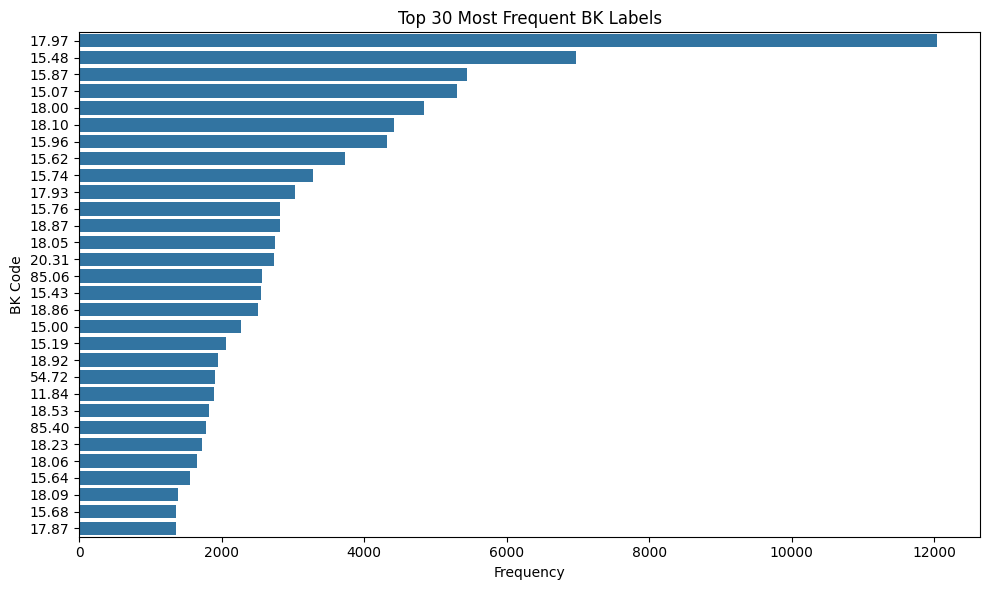

In [9]:
# Flatten list of labels
all_labels = [label for sublist in final_df["BK_split"] for label in sublist]
label_counts = Counter(all_labels)

# Convert to DataFrame
freq_df = pd.DataFrame(label_counts.items(), columns=["BK_Code", "Frequency"]).sort_values(by="Frequency", ascending=False)

# Plot Top N
top_n = 30
plt.figure(figsize=(10, 6))
sns.barplot(data=freq_df.head(top_n), x="Frequency", y="BK_Code")
plt.title(f"Top {top_n} Most Frequent BK Labels")
plt.xlabel("Frequency")
plt.ylabel("BK Code")
plt.tight_layout()
plt.show()


In [10]:
# Unique labels
unique_labels = sorted(set(all_labels))
label_index = {label: idx for idx, label in enumerate(unique_labels)}

# Initialize co-occurrence matrix
co_matrix = np.zeros((len(unique_labels), len(unique_labels)))

# Fill co-occurrence matrix
for labels in final_df["BK_split"]:
    for l1, l2 in combinations(set(labels), 2):
        i, j = label_index[l1], label_index[l2]
        co_matrix[i, j] += 1
        co_matrix[j, i] += 1  # symmetric

# Convert to DataFrame
co_df = pd.DataFrame(co_matrix, index=unique_labels, columns=unique_labels)

co_df.sample(5)

,01.00,01.10,01.11,01.14,01.18,01.20,01.22,01.24,01.25,01.29,...,89.85,89.86,89.87,89.89,89.90,89.91,89.92,89.93,89.94,89.99
73.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
89.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,1.0,2.0,0.0,0.0
44.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15.43,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,27.0,3.0,1.0,63.0,34.0,16.0,1.0,4.0,3.0


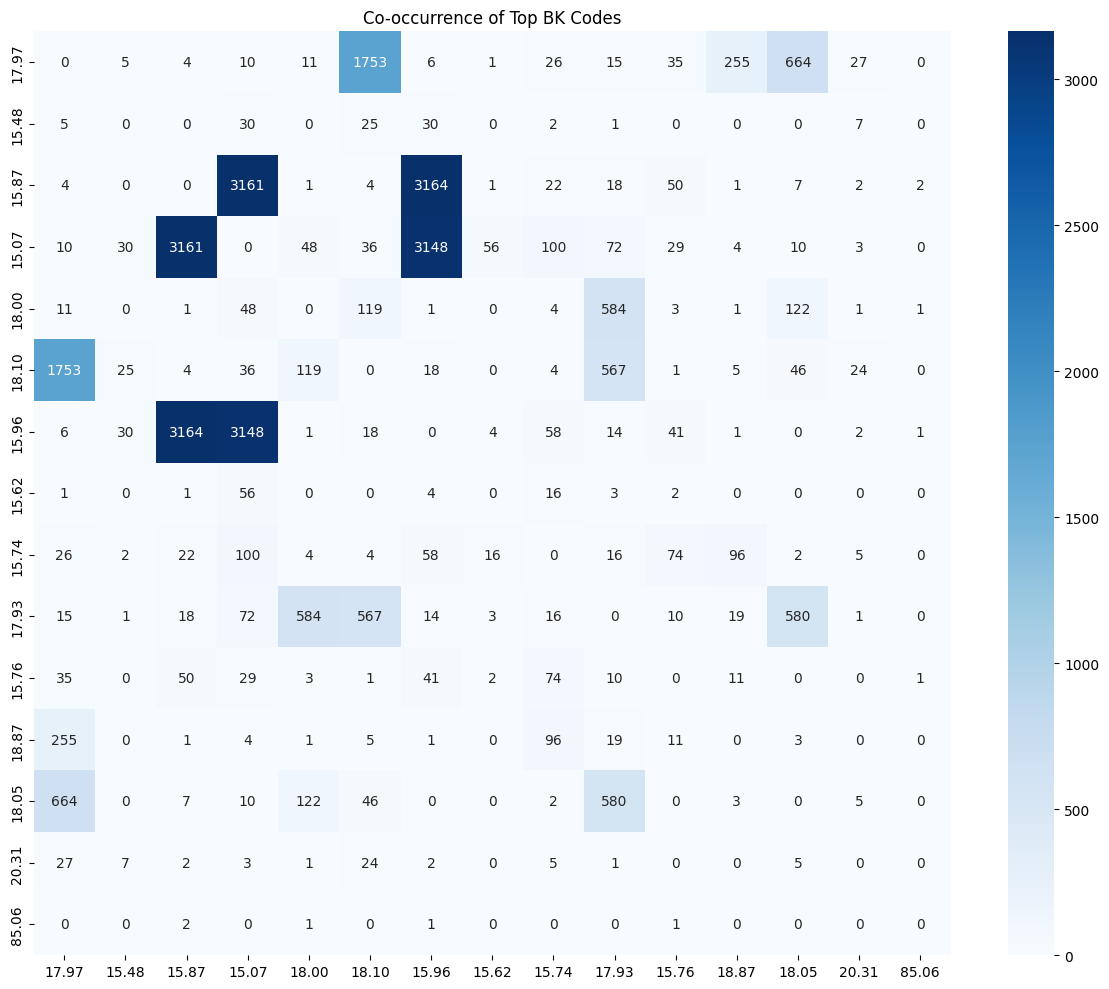

In [11]:
# Optionally filter top labels for visibility
top_labels = [x[0] for x in label_counts.most_common(15)]
co_df_top = co_df.loc[top_labels, top_labels]

plt.figure(figsize=(12, 10))
sns.heatmap(co_df_top, annot=True, fmt=".0f", cmap="Blues")
plt.title("Co-occurrence of Top BK Codes")
plt.tight_layout()
plt.show()


In [12]:
# Calculate number of labels per row
final_df["num_labels"] = final_df["BK_split"].apply(len)

# Summary statistics (optional)
print(final_df["num_labels"].describe())
print(final_df["num_labels"].value_counts().sort_index())

count    251149.000000
mean          1.791646
std           0.917208
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          10.000000
Name: num_labels, dtype: float64
num_labels
1     114523
2      90809
3      34026
4       8508
5       2321
6        712
7        185
8         42
9         19
10         4
Name: count, dtype: int64


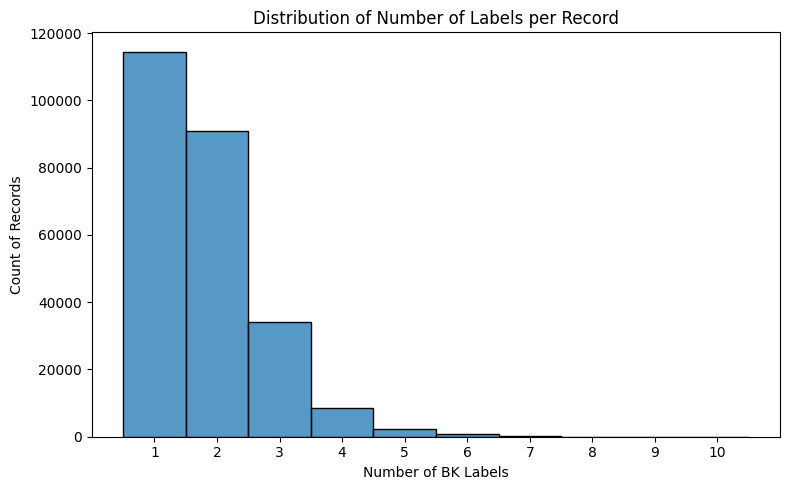

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(final_df["num_labels"], bins=range(1, final_df["num_labels"].max() + 2), discrete=True)
plt.title("Distribution of Number of Labels per Record")
plt.xlabel("Number of BK Labels")
plt.ylabel("Count of Records")
plt.xticks(range(1, final_df["num_labels"].max() + 1))
plt.tight_layout()
plt.show()

In [14]:
mean_labels = final_df["num_labels"].mean()
mode_labels = final_df["num_labels"].mode()[0]
print(f"Average number of labels per record: {mean_labels:.2f}")
print(f"Most common label count: {mode_labels}")


Average number of labels per record: 1.79
Most common label count: 1


In [15]:
final_df_filtered = final_df[final_df["num_labels"] <= 6].copy()
print(f"Original records: {len(final_df)}")
print(f"Filtered records (<=6 labels): {len(final_df_filtered)}")


Original records: 251149
Filtered records (<=6 labels): 250899


In [25]:
content_cols = ["Title","Summary", "Keywords", "LOC_Keywords", "RVK"]

# Define the condition: BK is not null AND all content columns are null or empty
mask = (
    final_df_filtered["BK"].notna() &
    final_df_filtered[content_cols].isna().all(axis=1)
)

# Filter out those rows
final_df_filtered_cleaned = final_df_filtered[~mask].copy()
print(final_df_filtered_cleaned.shape)

(250388, 12)


In [26]:
df_removed = final_df_filtered[mask]
print(f"Removed rows: {len(df_removed)}")
print(df_removed[["BK"] + content_cols].head())


Removed rows: 511
               BK Title Summary Keywords LOC_Keywords  RVK
1259  20.31|21.02   NaN     NaN      NaN          NaN  NaN
1260  20.31|21.02   NaN     NaN      NaN          NaN  NaN
1385  31.14|31.04   NaN     NaN      NaN          NaN  NaN
1572        06.14   NaN     NaN      NaN          NaN  NaN
2014  52.71|85.38   NaN     NaN      NaN          NaN  NaN


In [27]:
final_df_filtered_cleaned.head()


,PPN,Title,Author,Year,Summary,Keywords,LOC_Keywords,RVK,BK,BK_split,BK_all_numeric,num_labels
0,190620330X,Netzwerke im europäischen Verwaltungsverbund,NaN,2024,Nikolaos I. Simantiras untersucht Netzwerke al...,Mehrebenen-Verflechtung,NaN,Allgemeine Darstellungen|Demokratische Staatsf...,86.86|86.47,"[86.86, 86.47]",True,2
1,190594831X,Research handbook on disasters and internation...,NaN,2024,NaN,Internationales Umweltrecht,Disaster relief,NaN,86.62,[86.62],True,1
2,1869790383,Lösungsorientierte Supervisions-Tools,NaN,2023,NaN,NaN,NaN,NaN,79.30|77.72,"[79.30, 77.72]",True,2
3,1854114948,Reisen shūenki no Nichibei kankei,Yamaguchi,2023,NaN,Sicherheitspolitik,"Security, International",Allgemein,15.80|89.70,"[15.80, 89.70]",True,2
4,1851067329,Weidmannsheil - Blankenstein,NaN,2023,NaN,Wandern,NaN,NaN,74.20|76.79,"[74.20, 76.79]",True,2


In [28]:
import pandas as pd
from collections import Counter
import itertools

# Step 1: Analyze label frequency
all_labels = list(itertools.chain.from_iterable([str(bk).split("|") for bk in final_df_filtered_cleaned["BK"].dropna()]))
label_counts = Counter(all_labels)

# Step 2: Filter very rare labels (e.g., labels that appear only once)
threshold = 10
filtered_labels = {label for label, count in label_counts.items() if count > threshold}

# Show results
label_counts_df = pd.DataFrame(label_counts.items(), columns=["Label", "Frequency"]).sort_values(by="Frequency", ascending=False)
rare_labels = [label for label, count in label_counts.items() if count <= threshold]

# import ace_tools as tools; tools.display_dataframe_to_user(name="Label Frequency Analysis", dataframe=label_counts_df)

len(rare_labels)

194

/tmp/ipykernel_3926927/4177583817.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=label_df[label_df["Frequency"] >= 50], x="Label", y="Frequency", palette="viridis")


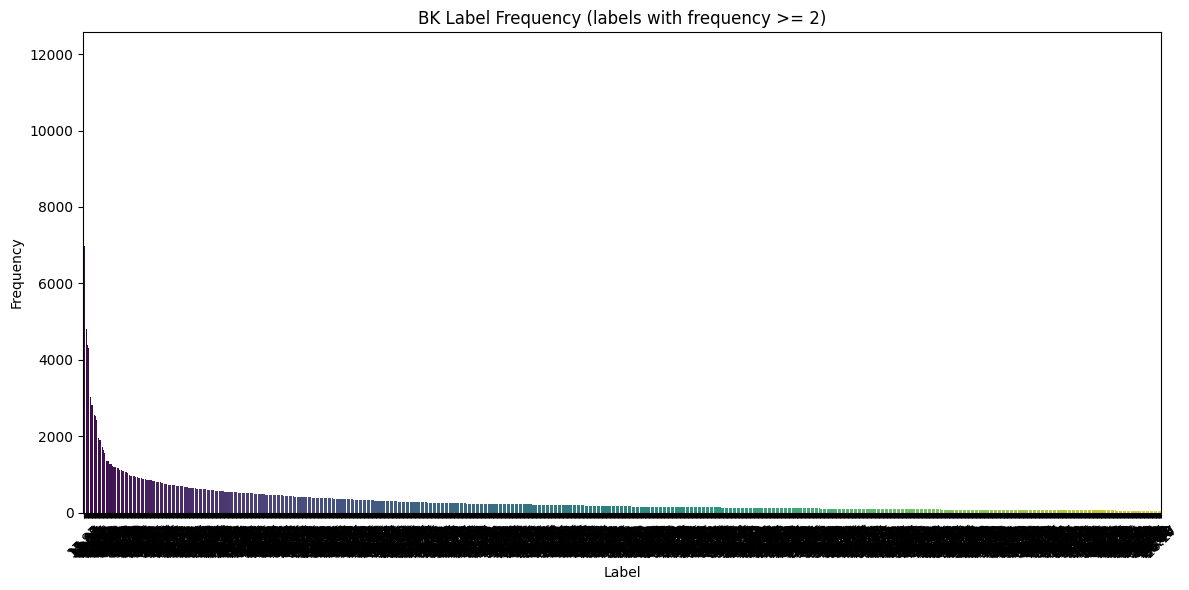

In [29]:
# Step 1: Analyze Label Frequency
all_labels = []
for bk in final_df_filtered_cleaned["BK"]:
    if pd.notna(bk):
        all_labels.extend(bk.split("|"))

label_counts = Counter(all_labels)
label_df = pd.DataFrame(label_counts.items(), columns=["Label", "Frequency"]).sort_values(by="Frequency", ascending=False)

# Step 2: Visualize Label Distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=label_df[label_df["Frequency"] >= 50], x="Label", y="Frequency", palette="viridis")
plt.title("BK Label Frequency (labels with frequency >= 2)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 3: Filter Out Rare Labels (frequency < 2)
rare_labels = set(label_df[label_df["Frequency"] < 50]["Label"])

In [30]:
len(rare_labels)


721

In [31]:
def filter_rare(row):
    labels = str(row).split("|")
    filtered = [l for l in labels if l not in rare_labels]
    return "|".join(filtered) if filtered else None

final_df_filtered_cleaned["BK"] = final_df_filtered_cleaned["BK"].apply(filter_rare)


In [32]:
final_df_filtered_cleaned[~final_df_filtered_cleaned["BK"].isna()].shape

(245784, 12)

In [33]:
final_df_filtered_cleaned[~final_df_filtered_cleaned["BK"].isna()].to_csv("data/k10plus_processed_rare_label_removed.csv")

In [34]:
final_df_filtered_cleaned = final_df_filtered_cleaned[~final_df_filtered_cleaned["BK"].isna()]

In [35]:
def build_and_save_label_map(bk_list, save_path="data/label_map.json"):
    """
    Extracts unique BK labels from pipe-separated strings, builds a label→index map,
    and saves it as a JSON file.
    """
    all_labels = set()

    for entry in bk_list:
        if pd.isna(entry) or entry.strip() == "":
            continue
        labels = [label.strip() for label in entry.split("|") if label.strip()]
        all_labels.update(labels)

    # Build sorted label → index map
    label_map = {label: idx for idx, label in enumerate(sorted(all_labels))}

    # Ensure output folder exists
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    # Save to JSON
    with open(save_path, "w") as f:
        json.dump(label_map, f, indent=2)

    print(f"Saved label map with {len(label_map)} labels to: {save_path}")
    return label_map

label_map = build_and_save_label_map(final_df_filtered_cleaned["BK"].tolist(), save_path="data/label_map.json")


Saved label map with 1355 labels to: data/label_map.json


In [23]:
import os

label_map_path = os.path.abspath("data/label_map.json")
print(f"Loading from: {label_map_path}")
with open(label_map_path, "r") as f:
    label_map = json.load(f)
print(label_map)

Loading from: /cephfs/users/bashir/basis_classification/data/label_map.json
{}


In [23]:
def convert_labels_to_binary(bk_list, label_map=None):
    """
    Converts BK codes to multi-hot binary labels.
    Args:
        bk_list (List[str]): list of BK values like "86.86|86.47"
        label_map (Dict[str, int], optional): existing mapping of label to index
    Returns:
        List[List[int]], Dict[str, int]: binary label list, and updated label_map
    """
    all_labels = set()
    processed_bk = []

    for entry in bk_list:
        labels = str(entry).split('|') if pd.notna(entry) else []
        processed_bk.append(labels)
        all_labels.update(labels)

    if label_map is None:
        label_map = {label: idx for idx, label in enumerate(sorted(all_labels))}

    binary_labels = []
    for labels in processed_bk:
        label_vec = [0] * len(label_map)
        for label in labels:
            if label in label_map:
                label_vec[label_map[label]] = 1
        binary_labels.append(label_vec)

    return binary_labels

# binary_labels, label_map = convert_labels_to_binary(final_df_filtered_cleaned["BK"].tolist(),label_map)

In [3]:
def convert_labels_to_binary(bk_list, label_map):
    """
    Converts BK codes to multi-hot binary labels of fixed length using a provided label_map.
    
    Args:
        bk_list (List[str]): List of BK values like "86.86|86.47"
        label_map (Dict[str, int]): Mapping from label string to index.
    
    Returns:
        List[List[int]]: Multi-hot encoded labels with consistent length.
    """
    label_count = len(label_map)
    binary_labels = []

    for entry in bk_list:
        label_vec = [0] * label_count
        labels = str(entry).split('|') if pd.notna(entry) else []
        for label in labels:
            if label in label_map:
                label_vec[label_map[label]] = 1
        binary_labels.append(label_vec)

    return binary_labels

In [22]:
final_df_filtered_cleaned.shape

(250388, 14)

In [25]:
# print(len(binary_labels))
# print(len(binary_labels[0]))

In [27]:
from transformers import AutoTokenizer
from torch.utils.data import DataLoader, TensorDataset
import torch

def transform_data(dataset, label_map, max_length=512, batch_size=64):
    """
    Prepares a PyTorch DataLoader for BART-based multi-label classification on BK labels.
    - Combines textual input from multiple columns
    - Tokenizes using facebook/bart-large
    - Converts BK labels into binary multi-hot vectors
    """

    # Combine input text fields into one
    sentences = (
    "Title: " + dataset["Title"].fillna('') + "\n" +
    "Summary: " + dataset["Summary"].fillna('') + "\n" +
    "Keywords: " + dataset["Keywords"].fillna('') + "\n" +
    "LOC_Keywords: " + dataset["LOC_Keywords"].fillna('') + "\n" +
    "RVK: " + dataset["RVK"].fillna('')
    ).tolist()

    # Tokenization
    tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large")
    encodings = tokenizer(sentences, truncation=True, padding=True, max_length=max_length, return_tensors='pt')
    input_ids = encodings['input_ids']
    attention_mask = encodings['attention_mask']

    # Convert BK labels to multi-hot binary
    bk_list = dataset["BK"].tolist()
    binary_labels = convert_labels_to_binary(bk_list, label_map=label_map)
    binary_labels_tensor = torch.tensor(binary_labels).float()

    # Build dataset and dataloader
    tensor_dataset = TensorDataset(input_ids, attention_mask, binary_labels_tensor)
    dataloader = DataLoader(tensor_dataset, batch_size=batch_size, shuffle=True)

    return dataloader

train_dataloader = transform_data(final_df_filtered_cleaned, label_map=label_map)


In [31]:
# Get first batch
batch = next(iter(train_dataloader))
input_ids, attention_mask, labels = batch

# Inspect shapes
print("Input IDs shape:", input_ids.shape)        # e.g., (batch_size, seq_len)
print("Attention mask shape:", attention_mask.shape)
print("Labels shape:", labels.shape)

# Decode first sample input
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large")
print(tokenizer.decode(input_ids[3], skip_special_tokens=True))

# View corresponding label
print("Binary labels for first sample:", labels[0])


Input IDs shape: torch.Size([64, 512])
Attention mask shape: torch.Size([64, 512])
Labels shape: torch.Size([64, 2076])
Title: Villen und Landhäuser
Summary: Villen und Landhäuser prägen in charakteristischer Weise das Gesicht der Hamburger Elbvororte. Viele dieser Häuser sind zwischen 1900 und 1935 erbaut worden. Ist hier ein eigener Hamburger "Heimatstil" entstanden? - Tatsächlich entfaltet sich zwischen Tradition und Moderne eine bemerkenswerte stilistische Vielfalt, die auch außerhalb Hamburgs genau wahrgenommen wurde. Alle namhaften Hamburger Architekten dieser Zeit bauten Wohnhäuser in den Elbvororten: von den "Traditionalisten" wie Walther Baedecker und Fernando Lorenzen bis zu den "Modernen" wie Rudolf Lodders, Werner Kallmorgen, Erich Elingius und Karl Schneider. Aber auch prominente auswärtige Architekten wie Hermann Muthesius, Martin Elsaesser und Henry van de Velde hinterließen hier ihre Spuren. Angereichert durch Analysen der Inneneinrichtung, der Gartengestaltung und der 

In [ ]:
final_df_filtered_cleaned.to_csv("data/k10plus_processed.csv")

: 